In [21]:
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
from PIL import Image
from shutil import copyfile
import numpy as np 
dir_path = os.getcwd()+'/img/'
people=['vishal','vijaya','debolina','shailaja','bidisha','mimansha','toppo','maharshee','moba','sarvagya','pataya','choudhary']
def readFiles(path):
    global maxWidth,maxHeight
    maxWidth=0
    maxHeight=0
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            im=Image.open(path+file)
            if im.size[0]>maxWidth :
                maxWidth=im.size[0]
            if im.size[1]>maxHeight :
                maxHeight=im.size[1]
    return
def processFiles(path):
    newpath= os.getcwd()+'/imgproc/'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for file in os.listdir(path):
        im=Image.new('RGB',(maxWidth,maxHeight),'black')
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            offset = ((maxWidth - newIM.size[0]) / 2, (maxHeight - newIM.size[1]) / 2)
            im.paste(newIM,offset)
            im.rotate(-90).save(newpath+newname[0]+'proc.JPG')
    return
def resizeImage(path):
    for file in os.listdir(path):
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            im = newIM.resize((128,128))
            im.save(path+newname[0]+'.JPG')
    return
def toGrayscale(path):
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            img= Image.open(path+file).convert('L')
            img.save(path+file)
    return
def trainandtest(path):
    traindat= os.getcwd()+'/imgtrain/'
    testdat= os.getcwd()+'/imgtest/'
    if not os.path.exists(traindat):
        os.makedirs(traindat)
    if not os.path.exists(testdat):
        os.makedirs(testdat)
    i=1
    for file in os.listdir(path):
        if file.endswith('.JPG'):
           print file
    return

def getPixelnew(path):
    result_arr = np.empty((16384,0))
    target=np.zeros((84,12))
    names = []
    
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            names.append(file)
  
    count = 0
    print names
    for file in names:
        if file.endswith('.JPG'):
            img = Image.open(path+file)
            arr=np.array(img.getdata())
            print file[:-5]
            tar = people.index(file[:-5])
            print file
            flat_arr=arr.ravel()
            flat_arr= np.reshape(flat_arr,(flat_arr.size,1))
            result_arr=np.append(result_arr,flat_arr,axis=1)
            count+=1
    result_arr = np.append(result_arr,np.ones((1,count)),axis=0)
    return result_arr


def getTestTarget():
    target=np.zeros((36,12))
    pos=0
    for i in range(36):
        target[i][pos]=1
        j=i+1
        if j%3 == 0:
            pos+=1
    return target

def processFilestest(path):
    newpath= path+'/imgprocrealtime/'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for file in os.listdir(path):
        im=Image.new('RGB',(maxWidth,maxHeight),'black')
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            offset = ((maxWidth - newIM.size[0]) / 2, (maxHeight - newIM.size[1]) / 2)
            im.paste(newIM,offset)
            im.save(newpath+newname[0]+'proc.JPG')
    return

In [2]:
readFiles(dir_path)
processFiles(dir_path)
resizeImage(os.getcwd()+'/imgproc/')
toGrayscale(os.getcwd()+'/imgproc/')

In [5]:
readFiles(dir_path)

In [10]:
def feedForward():
    input_arr=getPixelnew(os.getcwd()+'/imgtrain/')
    input_arr=input_arr/255 #normalise
    #print input_arr[147]
    alpha=0.000001
    weight = np.zeros((16385,12))
    target=getTarget()
    error=1.1
    i=0
    while(error>0.1):
        y=np.dot(np.transpose(input_arr),weight)
        difference = target-y
        dele=np.sum(difference)
        error=np.sum(np.square(difference))/2
        plt.plot(i,error,'r*')
        i+=1
        #print i
        weight=weight+alpha*np.dot(input_arr,difference)
    print 'Iterations : ',i
    return weight

def testFeedForward(weight):
    input_arr=getPixelnew(os.getcwd()+'/imgtest/')
    input_arr=input_arr/255 #normalise
    y=np.dot(np.transpose(input_arr),weight)
    people.sort()
    print y
    for i in range(input_arr.shape[1]):
        k=y[i]
        print 'Person is : '+people[np.where(k==np.max(k))[0][0]]
    return
import cv2
def realtimetesting(weight):
    home = os.getcwd()
    i=0
    for file in os.listdir(home+'/imgtestrealtime/'):
        i=i+1
    cap = cv2.VideoCapture(0)
    while(True):
        ret, frame = cap.read()
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)

        cv2.imshow('frame', rgb)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            out = cv2.imwrite(home+'/imgtestrealtime/capture'+str(i)+'.JPG', frame)
            break

    cap.release()
    cv2.destroyAllWindows()
    newpath=home+'/imgtestrealtime/'
    resizeImage(newpath)
    toGrayscale(newpath)
    input_arr=getPixel(newpath)
    input_arr=input_arr/255 #normalise
    y=np.dot(np.transpose(input_arr),weight)
    print y
    print input_arr.shape
    people.sort()
    for i in range(input_arr.shape[1]):
        k=y[i]
        print 'Person is : '+people[np.where(k==np.max(k))[0][0]]
    return

['bidisha1.JPG', 'bidisha2.JPG', 'bidisha3.JPG', 'bidisha4.JPG', 'bidisha5.JPG', 'bidisha6.JPG', 'bidisha7.JPG', 'choudhary1.JPG', 'choudhary2.JPG', 'choudhary3.JPG', 'choudhary4.JPG', 'choudhary5.JPG', 'choudhary6.JPG', 'choudhary7.JPG', 'debolina1.JPG', 'debolina2.JPG', 'debolina3.JPG', 'debolina4.JPG', 'debolina5.JPG', 'debolina6.JPG', 'debolina7.JPG', 'maharshee1.JPG', 'maharshee2.JPG', 'maharshee3.JPG', 'maharshee4.JPG', 'maharshee5.JPG', 'maharshee6.JPG', 'maharshee7.JPG', 'mimansha1.JPG', 'mimansha2.JPG', 'mimansha3.JPG', 'mimansha4.JPG', 'mimansha5.JPG', 'mimansha6.JPG', 'mimansha7.JPG', 'moba1.JPG', 'moba2.JPG', 'moba3.JPG', 'moba4.JPG', 'moba5.JPG', 'moba6.JPG', 'moba7.JPG', 'pataya1.JPG', 'pataya2.JPG', 'pataya3.JPG', 'pataya4.JPG', 'pataya5.JPG', 'pataya6.JPG', 'pataya7.JPG', 'sarvagya1.JPG', 'sarvagya2.JPG', 'sarvagya3.JPG', 'sarvagya4.JPG', 'sarvagya5.JPG', 'sarvagya6.JPG', 'sarvagya7.JPG', 'shailaja1.JPG', 'shailaja2.JPG', 'shailaja3.JPG', 'shailaja4.JPG', 'shailaja5.JPG

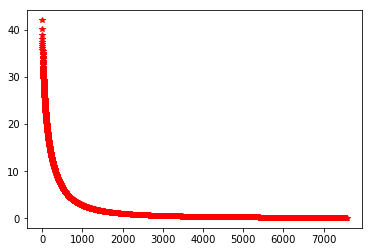

In [7]:
weight=feedForward()

In [8]:
testFeedForward(weight)

['bidisha10.JPG', 'bidisha8.JPG', 'bidisha9.JPG', 'choudhary10.JPG', 'choudhary8.JPG', 'choudhary9.JPG', 'debolina10.JPG', 'debolina8.JPG', 'debolina9.JPG', 'maharshee10.JPG', 'maharshee8.JPG', 'maharshee9.JPG', 'mimansha10.JPG', 'mimansha8.JPG', 'mimansha9.JPG', 'moba10.JPG', 'moba8.JPG', 'moba9.JPG', 'pataya10.JPG', 'pataya8.JPG', 'pataya9.JPG', 'sarvagya10.JPG', 'sarvagya8.JPG', 'sarvagya9.JPG', 'shailaja10.JPG', 'shailaja8.JPG', 'shailaja9.JPG', 'toppo10.JPG', 'toppo8.JPG', 'toppo9.JPG', 'vijaya10.JPG', 'vijaya8.JPG', 'vijaya9.JPG', 'vishal10.JPG', 'vishal8.JPG', 'vishal9.JPG']
[[  7.12595779e-01   1.01688428e-02   4.01155664e-02   5.27959518e-03
    5.42879586e-02   1.76383130e-01   2.81254878e-02   1.53260363e-01
    1.72056862e-02  -9.68974662e-02  -5.58288272e-02   3.81270900e-03]
 [  1.05909101e+00   4.68734811e-02  -2.31277039e-02  -6.76746739e-02
   -2.37636670e-02   6.94597834e-03  -7.21133142e-03  -3.53051832e-03
    6.36111291e-03   2.73085946e-02  -3.31564428e-02   4.579

In [11]:
realtimetesting(weight)

[[ 0.29384198  0.00335184  0.2711869   0.30994453 -0.24404096  0.00518481
   0.12250168 -0.10355625 -0.22400604  0.23895854  0.15902651  0.10111717]]
(16385, 1)
Person is : maharshee


In [5]:
def backprop():
    input_arr=getPixelnew(os.getcwd()+'/imgtrain/')
    input_arr=input_arr/255 #normalise
    #print input_arr.shape
    #print input_arr[147]
    alpha=0.000001
    #initialising weights
    weight1 = np.zeros((16385,16385) )
    weight2 = np.zeros((16385,12) )

    i=0
    error = 1000
    while ((error>0.1) and (i<5)):
        #forward Pass
        hiddenLayerInput = np.dot(np.transpose(input_arr),weight1)
        hiddenLayerOutput = 1/(1+np.exp(-hiddenLayerInput))
        outputLayerInput = np.dot(hiddenLayerOutput,weight2)
        FinalOutput = 1/(1+np.exp(-outputLayerInput))
       

        #error calculation
        target=getTarget()
        difference= target - FinalOutput
        error=np.sum(np.square(difference))/2
        print error,i
        plt.plot(i,error,'r*')

        #weight updation output layer
        delta = difference*FinalOutput*(1-FinalOutput)
        weight2 += (alpha*np.dot(np.transpose(hiddenLayerOutput),delta))

        #weight updation hidden layers
        temp = hiddenLayerOutput*(1-hiddenLayerOutput)
        temp2 = np.dot(weight2,np.transpose(delta))
        temp3 = temp2.sum(axis=1)
        weight1 += alpha*temp3*np.dot(input_arr,temp)
        i+=1
    print "Number of iterations : " , i  
    return(weight1, weight2)
    

['bidisha1.JPG', 'bidisha2.JPG', 'bidisha3.JPG', 'bidisha4.JPG', 'bidisha5.JPG', 'bidisha6.JPG', 'bidisha7.JPG', 'choudhary1.JPG', 'choudhary2.JPG', 'choudhary3.JPG', 'choudhary4.JPG', 'choudhary5.JPG', 'choudhary6.JPG', 'choudhary7.JPG', 'debolina1.JPG', 'debolina2.JPG', 'debolina3.JPG', 'debolina4.JPG', 'debolina5.JPG', 'debolina6.JPG', 'debolina7.JPG', 'maharshee1.JPG', 'maharshee2.JPG', 'maharshee3.JPG', 'maharshee4.JPG', 'maharshee5.JPG', 'maharshee6.JPG', 'maharshee7.JPG', 'mimansha1.JPG', 'mimansha2.JPG', 'mimansha3.JPG', 'mimansha4.JPG', 'mimansha5.JPG', 'mimansha6.JPG', 'mimansha7.JPG', 'moba1.JPG', 'moba2.JPG', 'moba3.JPG', 'moba4.JPG', 'moba5.JPG', 'moba6.JPG', 'moba7.JPG', 'pataya1.JPG', 'pataya2.JPG', 'pataya3.JPG', 'pataya4.JPG', 'pataya5.JPG', 'pataya6.JPG', 'pataya7.JPG', 'sarvagya1.JPG', 'sarvagya2.JPG', 'sarvagya3.JPG', 'sarvagya4.JPG', 'sarvagya5.JPG', 'sarvagya6.JPG', 'sarvagya7.JPG', 'shailaja1.JPG', 'shailaja2.JPG', 'shailaja3.JPG', 'shailaja4.JPG', 'shailaja5.JPG

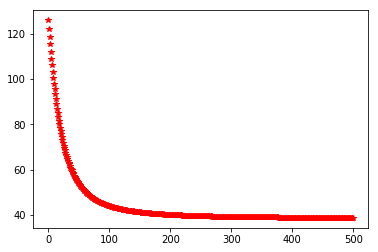

In [6]:
(weight1,weight2) = backprop()

In [22]:
def testBackProp(weight1, weight2):
    input_arr=getPixelnew(os.getcwd()+'/imgtest/')
    input_arr=input_arr/255 #normalise
    
    
    hiddenLayerInput = np.dot(np.transpose(input_arr),weight1)
    hiddenLayerOutput = 1/(1+np.exp(-hiddenLayerInput))
    outputLayerInput = np.dot(hiddenLayerOutput,weight2)
    FinalOutput = 1/(1+np.exp(-outputLayerInput))
    
    people.sort()
    target = getTarget()
    for i in range(input_arr.shape[1]):
        k=FinalOutput[i]
        print k, target[i]
        print 'Person is : '+people[np.where(k==np.max(k))[0][0]]
   
    
    y_test_class = np.argmax(target,axis=1)
    y_pred_class = np.argmax(FinalOutput,axis=1)
    
    success =0.0;failure =0.0; result=0.0
    for i in range(0,target.shape[0]):
        print y_pred_class[i], y_test_class[i]
        if(y_pred_class[i]==y_test_class[i]):
            success+=1
        else:
            failure+=1
   
    result = success / test_target.shape[0]
    
    print result*100
    return result*100

In [23]:
testBackProp(weight1,weight2)

['bidisha10.JPG', 'bidisha8.JPG', 'bidisha9.JPG', 'choudhary10.JPG', 'choudhary8.JPG', 'choudhary9.JPG', 'debolina10.JPG', 'debolina8.JPG', 'debolina9.JPG', 'maharshee10.JPG', 'maharshee8.JPG', 'maharshee9.JPG', 'mimansha10.JPG', 'mimansha8.JPG', 'mimansha9.JPG', 'moba10.JPG', 'moba8.JPG', 'moba9.JPG', 'pataya10.JPG', 'pataya8.JPG', 'pataya9.JPG', 'sarvagya10.JPG', 'sarvagya8.JPG', 'sarvagya9.JPG', 'shailaja10.JPG', 'shailaja8.JPG', 'shailaja9.JPG', 'toppo10.JPG', 'toppo8.JPG', 'toppo9.JPG', 'vijaya10.JPG', 'vijaya8.JPG', 'vijaya9.JPG', 'vishal10.JPG', 'vishal8.JPG', 'vishal9.JPG']
bidisha1


ValueError: 'bidisha1' is not in list